In [83]:
# importing the necesary libraries
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree

In [84]:
# changing the graphical data to a tabular form
data = [
[ 1, 1,"T"],
[ 1, 2,"S"],
[ 2, 1,"S"],
[ 2, 2,"T"],

[ 3, 1,"T"],
[ 3, 2,"S"],
[ 4, 1,"S"],
[ 4, 2,"T"],

[ 5, 1,"S"],
[ 5, 2,"S"],
[ 6, 1,"S"],
[ 6, 2,"S"],

[ 7, 1,"S"],
[ 7, 2,"S"],
[ 8, 1,"S"],
[ 8, 2,"S"]
]


In [85]:
# casting into pandas DataFrame type from list
data = pd.DataFrame(data)

# separating the label from the data and replacing the string values with the 0 and 1 numerical values
label = data[2]
label.replace(['S','T'],[1,0],inplace=True)

# droping the category names in the data as it will not be in the training dataset
data = data.drop(2, axis = 1)
label

0     0
1     1
2     1
3     0
4     0
5     1
6     1
7     0
8     1
9     1
10    1
11    1
12    1
13    1
14    1
15    1
Name: 2, dtype: int64

In [86]:
# splitting the data into training and testing datasets
x_train, x_test, y_train, y_test = train_test_split(data, label, test_size=0.2)


In [87]:
# calling the DecisionTreeClassifier and initializing the model and fitting the data with the model
model = DecisionTreeClassifier(criterion = "entropy", max_depth = 50)
model.fit(x_train, y_train)

# using the x_test dataset to test the model and calculate an accuracy
pred = model.predict(x_test)
acc = accuracy_score(y_test, pred)

# displaying some paramaters of the tree
val = model.get_n_leaves()
params = model.get_params()

print(val)
print(params)


6
{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'entropy', 'max_depth': 50, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': None, 'splitter': 'best'}


In [88]:
# displaying the decision tree

text_representation = tree.export_text(model)
print(text_representation)

|--- feature_0 <= 4.50
|   |--- feature_0 <= 2.50
|   |   |--- class: 1
|   |--- feature_0 >  2.50
|   |   |--- feature_1 <= 1.50
|   |   |   |--- feature_0 <= 3.50
|   |   |   |   |--- class: 0
|   |   |   |--- feature_0 >  3.50
|   |   |   |   |--- class: 1
|   |   |--- feature_1 >  1.50
|   |   |   |--- feature_0 <= 3.50
|   |   |   |   |--- class: 1
|   |   |   |--- feature_0 >  3.50
|   |   |   |   |--- class: 0
|--- feature_0 >  4.50
|   |--- class: 1



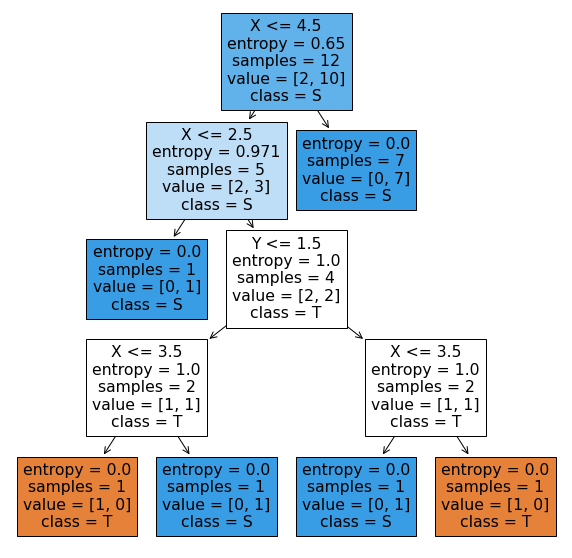

In [89]:
fig = plt.figure(figsize=(10,10))
_ = tree.plot_tree(model, 
                   feature_names = ["X", "Y"],
                   class_names = ["T", "S"],
                   filled = True)